In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
april = pd.read_csv('./data/uber-trip-data/uber-trip-data/uber-raw-data-apr14.csv')

In [3]:
april

Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]

In [4]:
april.Base.value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [5]:
april.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

### Create new features from the datetime

In [6]:
import datetime as dt

In [7]:
april['date'] = pd.to_datetime(april['Date/Time'])
april['day'] = april['date'].dt.day
april['time'] = april['date'].dt.hour
april['dayofweek'] = april['date'].dt.dayofweek
april['weekday'] = april['date'].dt.strftime("%A")

In [8]:
april['weekday'].value_counts().sort_values(ascending=False)

Wednesday    108631
Tuesday       91185
Friday        90303
Thursday      85067
Saturday      77218
Monday        60861
Sunday        51251
Name: weekday, dtype: int64

In [9]:
from sklearn.cluster import KMeans

In [10]:
import plotly.express as px

day 0 : (10000, 2)


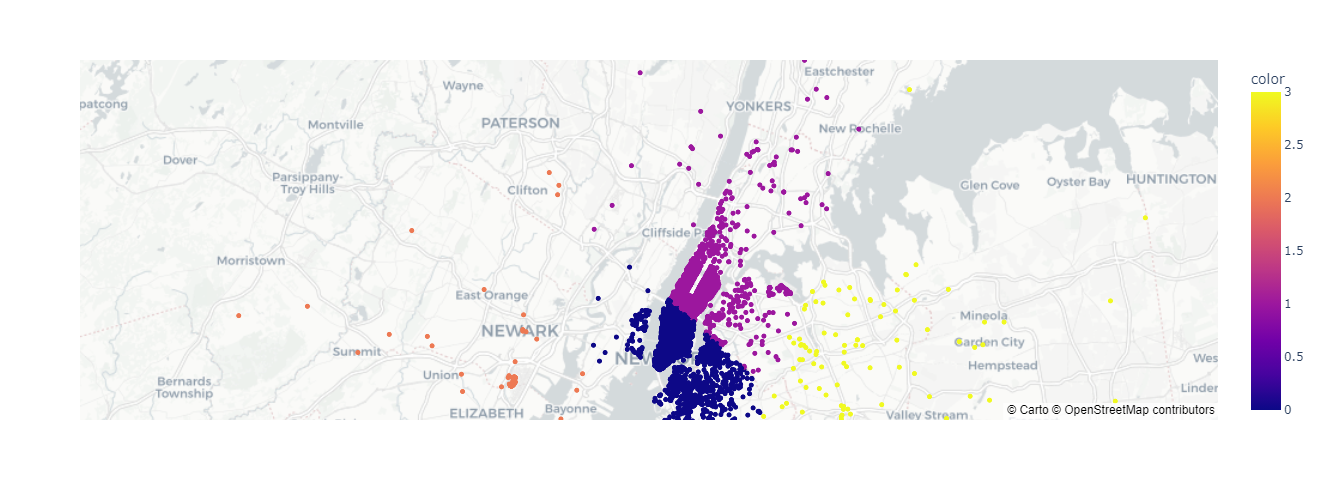

day 1 : (10000, 2)


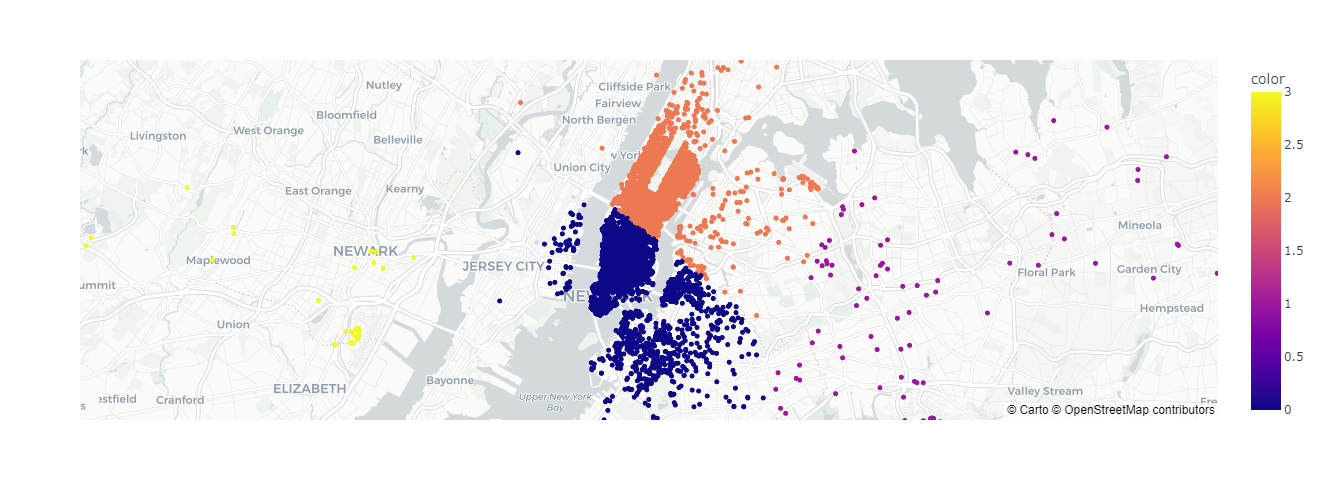

day 2 : (10000, 2)


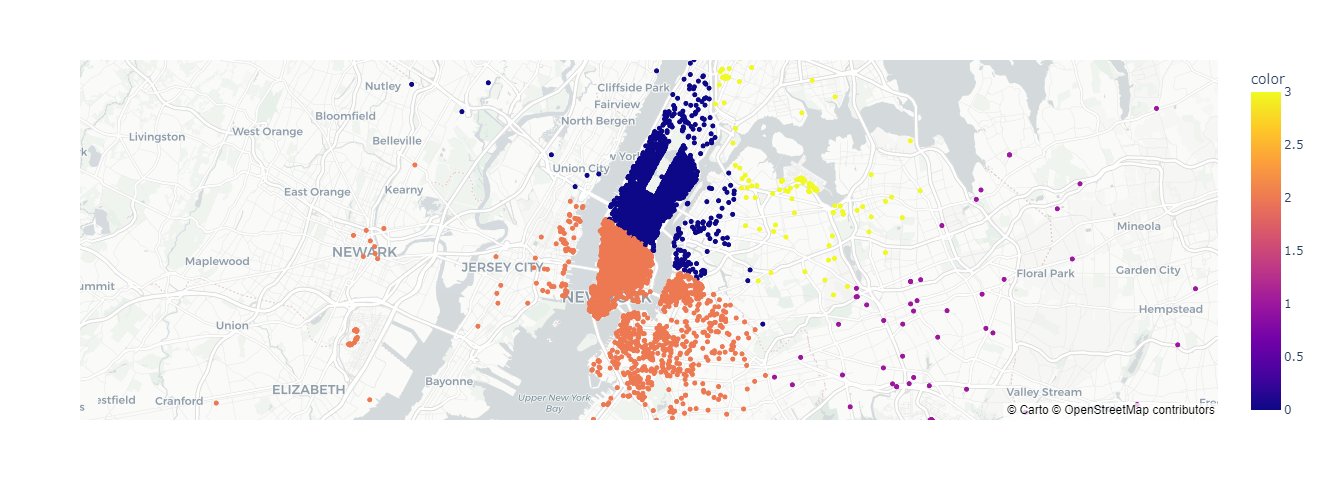

day 3 : (10000, 2)


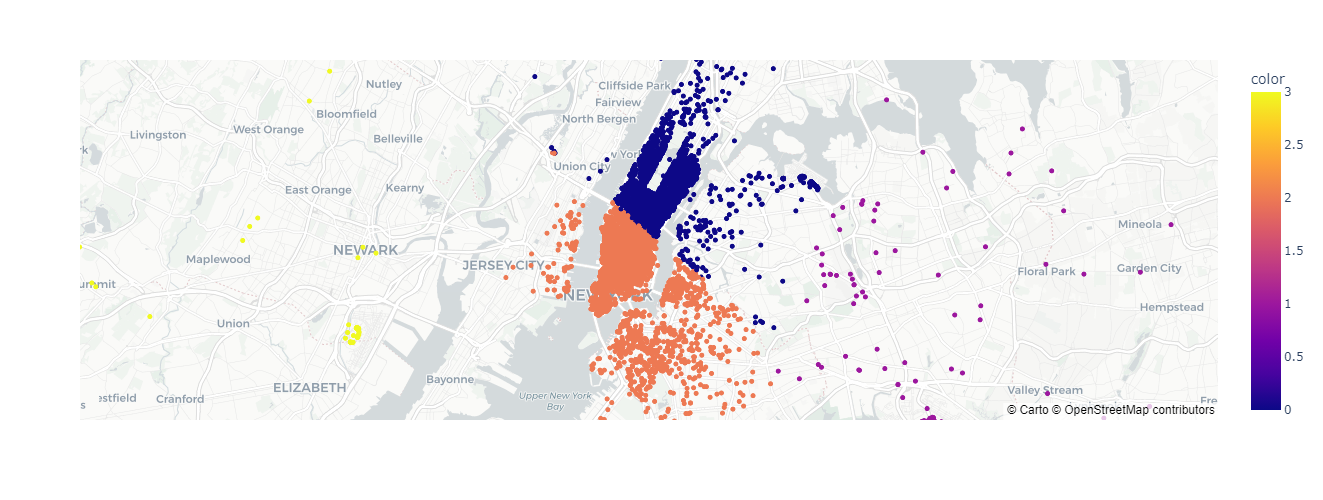

day 4 : (10000, 2)


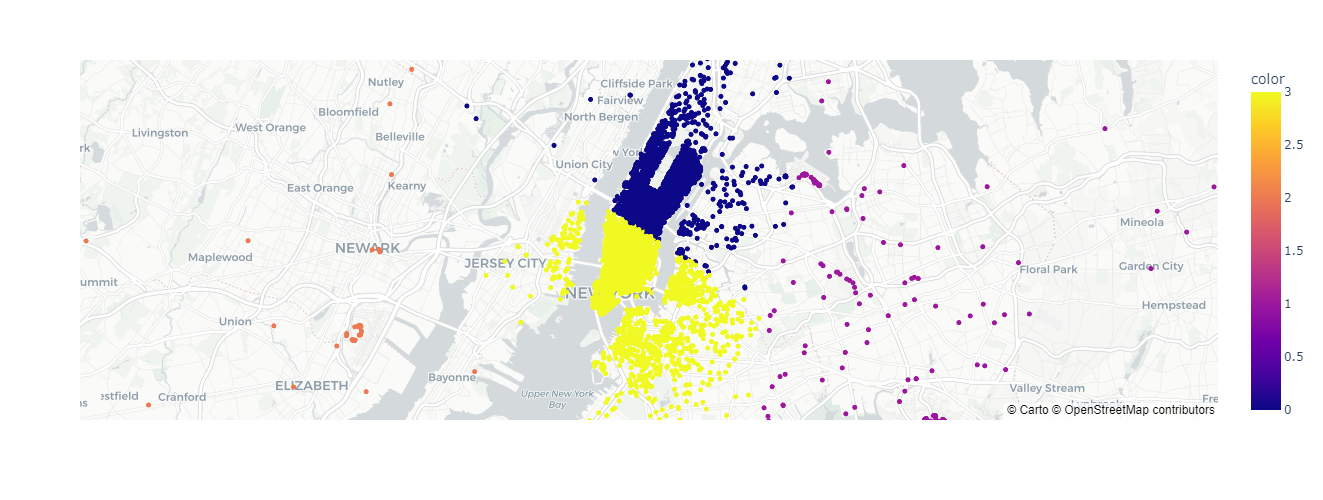

day 5 : (10000, 2)


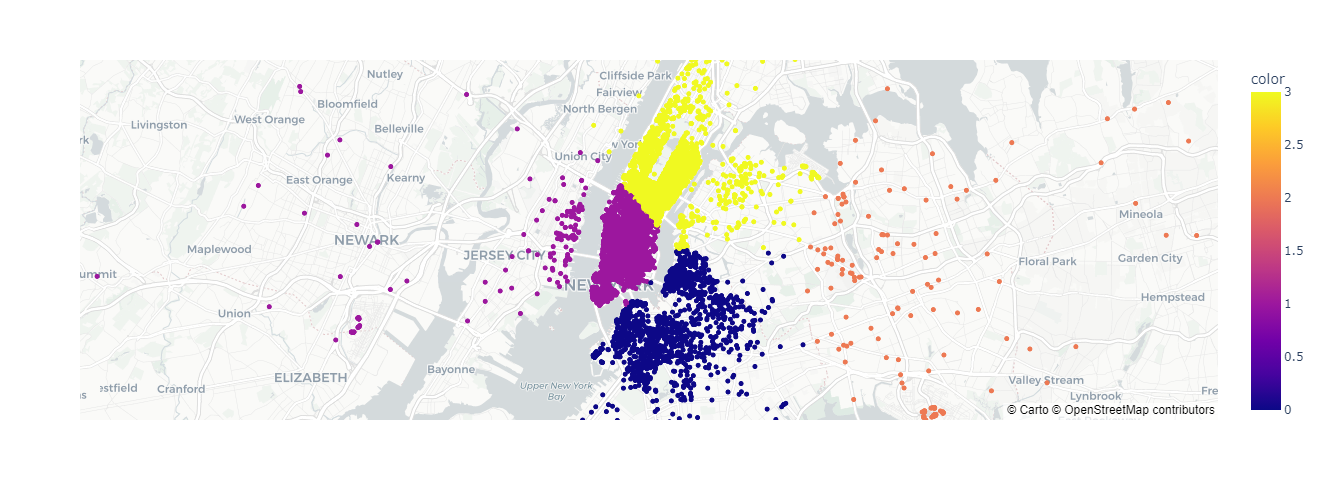

day 6 : (10000, 2)


In [13]:
coords = ['Lat', 'Lon']
for d in range(7):
    df = april[april['dayofweek'] == d].loc[:, coords].sample(10000)
    print(f'day {d} : {df.shape}')
    kmeans =  KMeans(n_clusters= 4, init = "k-means++", random_state = 0)
    kmeans.fit(df)
    clusters = kmeans.predict(df)
    #Draw map
    fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", color=clusters, zoom=5, mapbox_style="carto-positron")
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

In [ ]:
### Elbow to check the optimal clusters

In [32]:
def calculate_elbow_points(X):
    wcss =  []
    k = []
    for i in range (1,11): 
        kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        k.append(i)
        print("WCSS for K={} --> {}".format(i, wcss[-1]))
    return wcss, k    

In [33]:
def draw_elbow(wcss, k, day):
    '''
    Parameters:
    -----------------
    wcss: array, list of inertia values
    k:array, list of integer numbers representing the cluster numbers
    '''
    # Create DataFrame
    wcss_frame = pd.DataFrame(wcss)
    k_frame = pd.Series(k)

    # Create figure
    fig= px.line(
        wcss_frame,
        x=k_frame,
        y=wcss_frame.iloc[:,-1]
    )

    # Create title and axis labels
    fig.update_layout(
        yaxis_title="Inertia",
        xaxis_title="# Clusters",
        title=f"Inertia per cluster day={day}"
    )

    # Render
    fig.show() #renderer="notebook"
   # fig.show(renderer="iframe") # if using workspace

In [23]:
wcss, k = calculate_elbow_points(april[april['dayofweek'] == 2].loc[:, coords])

WCSS for K=1 --> 33.17000239380703
WCSS for K=2 --> 20.713990964975988
WCSS for K=3 --> 15.274058326102843
WCSS for K=4 --> 12.100022555279121
WCSS for K=5 --> 9.15134372003584
WCSS for K=6 --> 7.247706530175636
WCSS for K=7 --> 6.116139851700706
WCSS for K=8 --> 5.288693289162278
WCSS for K=9 --> 4.82384815284816
WCSS for K=10 --> 4.350091715651712


In [30]:
draw_elbow(wcss, k, 2)

WCSS for K=1 --> 285.0323335822956
WCSS for K=2 --> 163.61565661767926
WCSS for K=3 --> 122.75165353738701
WCSS for K=4 --> 92.47218561979412
WCSS for K=5 --> 67.08683366752943
WCSS for K=6 --> 54.03424088216025
WCSS for K=7 --> 46.681829764782485
WCSS for K=8 --> 39.9351132988157
WCSS for K=9 --> 35.74104463529977
WCSS for K=10 --> 32.52250627904205


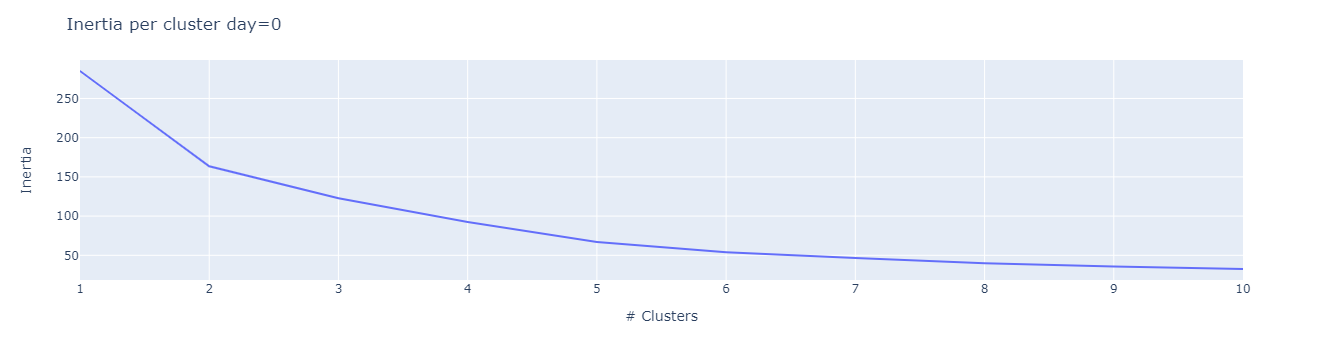

WCSS for K=1 --> 325.80511605649326
WCSS for K=2 --> 203.56031112642242
WCSS for K=3 --> 150.18926049935683
WCSS for K=4 --> 116.12010767612902
WCSS for K=5 --> 87.97747299727497
WCSS for K=6 --> 70.31595806544475
WCSS for K=7 --> 59.219047984448615
WCSS for K=8 --> 51.32449623102592
WCSS for K=9 --> 46.477037181459615
WCSS for K=10 --> 42.26553762260607


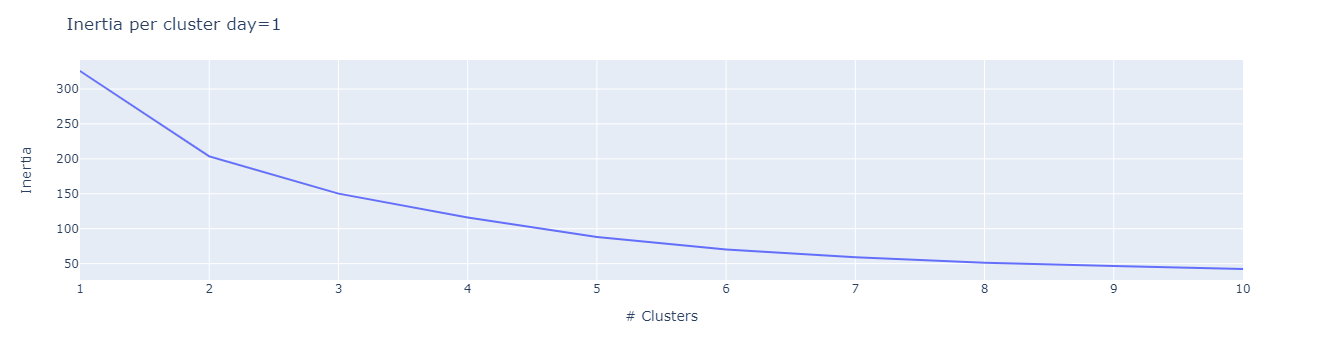

WCSS for K=1 --> 371.764228550154
WCSS for K=2 --> 234.61205387545147
WCSS for K=3 --> 174.34707670570714
WCSS for K=4 --> 136.62250101124224
WCSS for K=5 --> 104.84046554380113
WCSS for K=6 --> 84.72391540706884
WCSS for K=7 --> 69.0890527119688
WCSS for K=8 --> 59.87065270731725
WCSS for K=9 --> 54.10793621442202
WCSS for K=10 --> 49.23748109263254


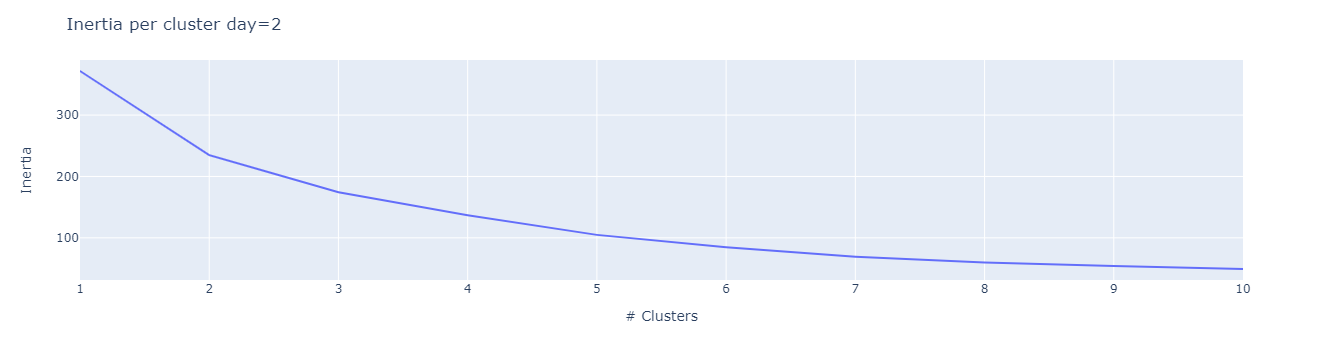

WCSS for K=1 --> 307.95290810626744
WCSS for K=2 --> 192.22189127131344
WCSS for K=3 --> 145.8150119483742
WCSS for K=4 --> 113.4620206413818
WCSS for K=5 --> 86.00555755117001
WCSS for K=6 --> 69.51709492767677
WCSS for K=7 --> 56.52080075861357
WCSS for K=8 --> 49.311555229743455
WCSS for K=9 --> 44.96834874375896
WCSS for K=10 --> 40.903863705938605


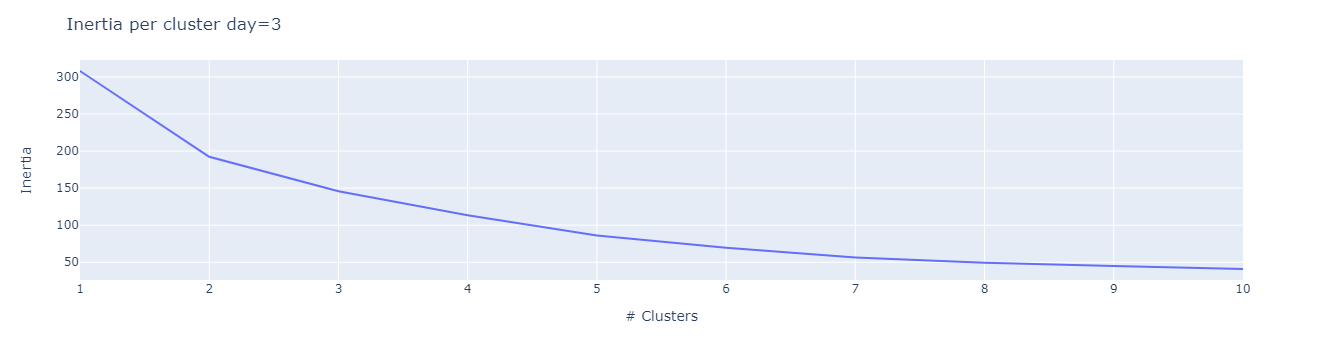

WCSS for K=1 --> 306.76687812187225
WCSS for K=2 --> 198.41654044749737
WCSS for K=3 --> 146.76783970120013
WCSS for K=4 --> 119.25720433875257
WCSS for K=5 --> 96.1281139368913
WCSS for K=6 --> 76.07605569885332
WCSS for K=7 --> 62.90785702750796
WCSS for K=8 --> 55.37207937333399
WCSS for K=9 --> 49.47542409316774
WCSS for K=10 --> 44.61227642159818


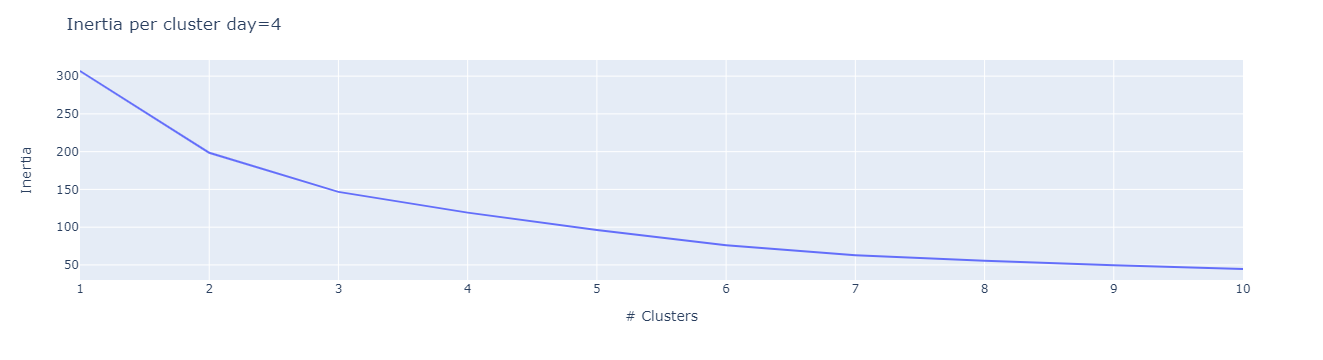

WCSS for K=1 --> 281.8787908052194
WCSS for K=2 --> 192.56324772074012
WCSS for K=3 --> 142.6759634112606
WCSS for K=4 --> 114.68125856313131
WCSS for K=5 --> 95.42182283836588
WCSS for K=6 --> 76.33592130446725
WCSS for K=7 --> 63.117359804106776
WCSS for K=8 --> 55.779683027081774
WCSS for K=9 --> 49.95582917593022
WCSS for K=10 --> 44.71802154123872


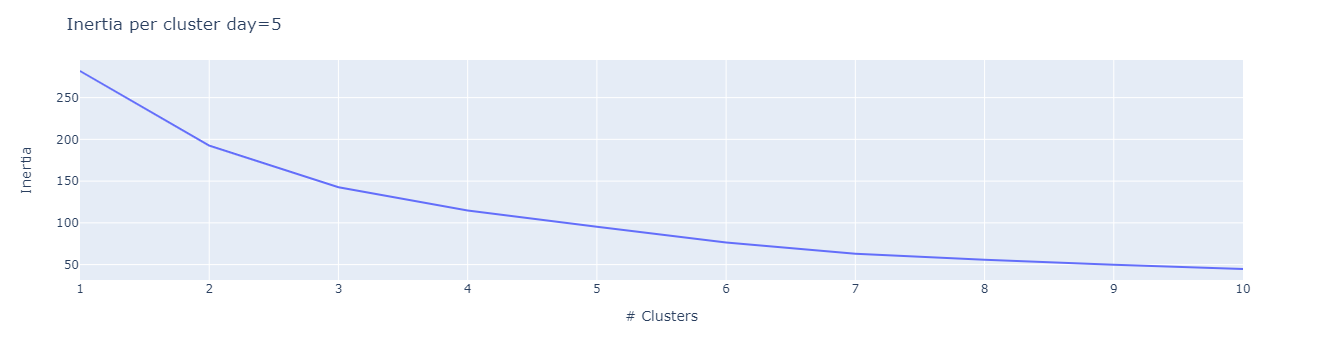

WCSS for K=1 --> 283.15338994610624
WCSS for K=2 --> 164.529517822934
WCSS for K=3 --> 126.12654447044336
WCSS for K=4 --> 97.28266025890692
WCSS for K=5 --> 73.93116576347073
WCSS for K=6 --> 57.07806259490142
WCSS for K=7 --> 48.758693014432374
WCSS for K=8 --> 43.53626007714684
WCSS for K=9 --> 38.51684091716823
WCSS for K=10 --> 34.7483826089566


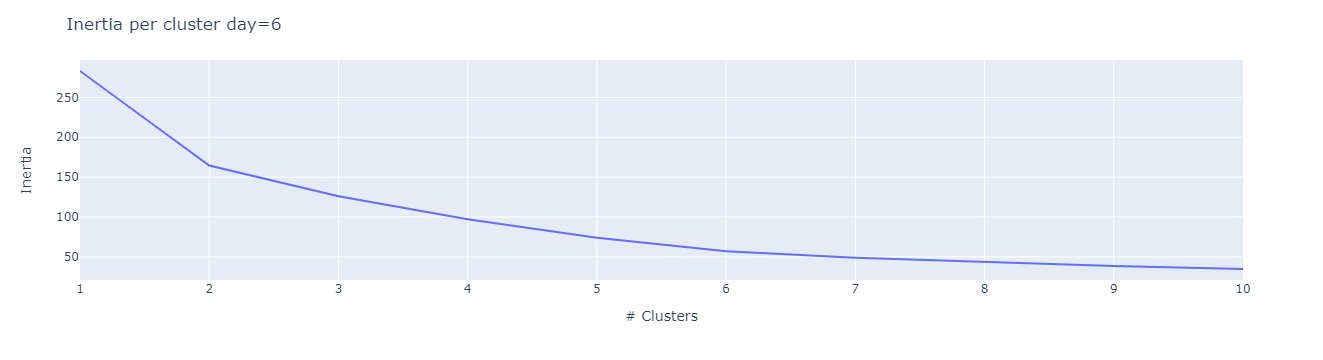

In [34]:
for d in range(7):
    wcss, k = calculate_elbow_points(april[april['dayofweek'] == d].loc[:, coords])
    draw_elbow(wcss, k, d)

In [35]:
def fit_predict_draw(data, n_clusters):
    coords = ['Lat', 'Lon']
    for d in range(1):
        df = data[data['dayofweek'] == d].loc[:, coords]
        print(f'day {d} : {df.shape}')
        kmeans =  KMeans(n_clusters= n_clusters, init = "k-means++", random_state = 0)
        kmeans.fit(df)
        clusters = kmeans.predict(df)
        #Draw map
        df_sample = df.sample(10000)
        clus_sample = clusters[df_sample.index]
        fig = px.scatter_mapbox(df_sample, lat="Lat", lon="Lon", color=clus_sample, zoom=5, mapbox_style="carto-positron")
        fig.update_layout(autosize=False, width=500, height=500)
        fig.show()

In [37]:
fit_predict_draw(april, 5)

day 0 : (60861, 2)


IndexError: index 376581 is out of bounds for axis 0 with size 60861

In [ ]:
  df_sample = df.sample(10000)
clus_sample = clusters[df_sample.index]